In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
brown2 = '#B45419'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
teal1 = '#294839'
green1 = '#6DA08C'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#7A693B'
beige2 = '#A89677'
beige3 = '#D2CDAD'
grey1 = '#E7E7E7'
grey2 = '#D7D7D7'
grey3 = '#C6C6C6'
grey4 = '#939393'
blue1 = '#3EA1C0'

In [169]:
file_path = 'Results/bolivia_v1_reg4_peak2_sce1_randomSGR_202404171439/results_output_EuropePlot.csv'

In [170]:
# Helper functions
def get_colors(carriers):
    colors = [beige2, beige3, green2, beige1, teal4, yellow, teal2, teal2, brown2]
    names = ['CCGT',   'OCGT',  'Biomass',  'Oil'  ,'Wind', 'Solar', 'Hydro river', 'Hydro storage', 'Geothermal']
    color_dict = dict(zip(names, colors))
    colors_new = [color_dict[carrier] for carrier in carriers]
    return colors_new

def rename_columns(df):
    new_names = ['CCGT',   'OCGT',  'Biomass',  'Oil'  ,'Wind', 'Solar', 'Hydro river', 'Hydro storage', 'Geothermal']
    old_names = ['GasCCGT',    'GasOCGT',  'Bio',   'Oilexisting',  'Windonshore',  'Solar'  ,'Hydrorun-of-the-river', 'Hydroregulated', 'Geo']
    name_map= dict(zip(old_names, new_names))
    df = df.rename(columns=name_map)
    return df

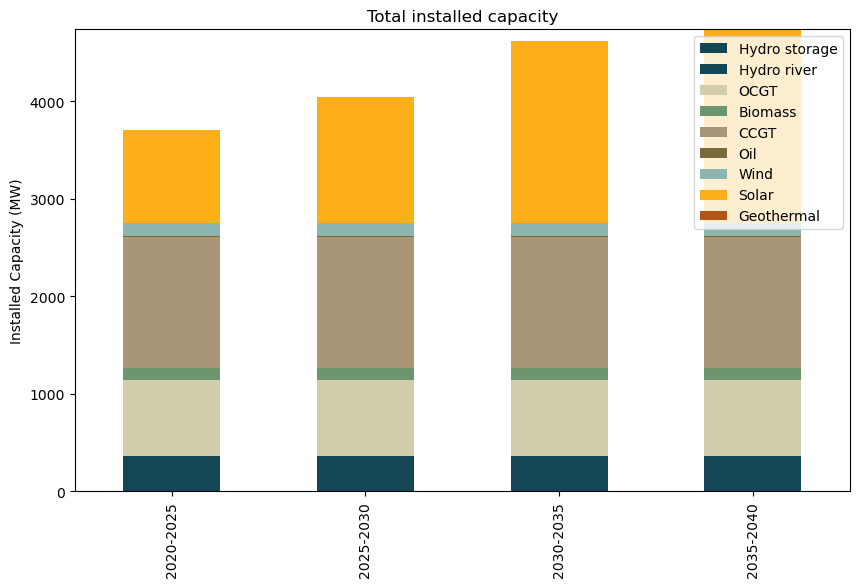

In [171]:
included_rows = [3,4,5,6]

# Initialize an empty list to store data
data_list = []

# Open the CSV file
with open(file_path, 'r') as file:
    next(file)
    headers = file.readline().strip().split(',')  # Read the first line to get headers
    for i, line in enumerate(file, start=2):  # Start counting from 2 since headers are at line 1
        if i in included_rows:
            # Split the line by comma, or change delimiter as necessary
            values = line.strip().split(',')
            # Create a dictionary for the row using a dictionary comprehension and zip to pair headers and values
            row_data = dict(zip(headers, values))
            data_list.append(row_data)

# Convert the list of dictionaries to a DataFrame
installed_cap = pd.DataFrame(data_list)
# Optionally set one of the columns as the index
installed_cap.set_index('', inplace=True)
for column in installed_cap.columns:
    installed_cap[column] = pd.to_numeric(installed_cap[column], errors='coerce')

installed_cap = rename_columns(installed_cap)
installed_cap.plot(kind='bar', stacked=True, figsize=(10, 6), color=get_colors(installed_cap.columns))

# Adding titles and labels
plt.title('Total installed capacity')
plt.ylabel('Installed Capacity (MW)')

# Showing the plot
plt.show()

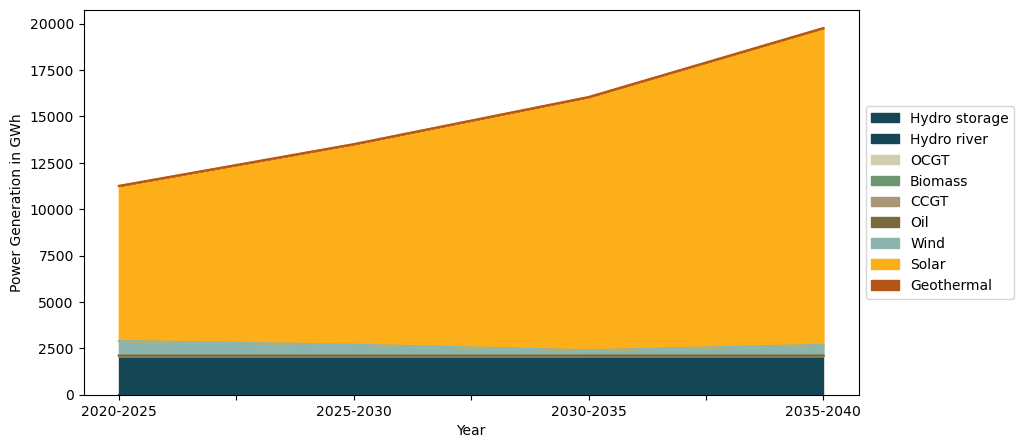

In [172]:
included_rows = [10,11,12,13]

# Initialize an empty list to store data
data_list = []

# Open the CSV file
with open(file_path, 'r') as file:
    next(file)
    headers = file.readline().strip().split(',')  # Read the first line to get headers
    for i, line in enumerate(file, start=2):  # Start counting from 2 since headers are at line 1
        if i in included_rows:
            # Split the line by comma, or change delimiter as necessary
            values = line.strip().split(',')
            # Create a dictionary for the row using a dictionary comprehension and zip to pair headers and values
            row_data = dict(zip(headers, values))
            data_list.append(row_data)

# Convert the list of dictionaries to a DataFrame
dispatch = pd.DataFrame(data_list)
# Optionally set one of the columns as the index
dispatch.set_index('', inplace=True)
for column in dispatch.columns:
    dispatch[column] = pd.to_numeric(dispatch[column], errors='coerce')


dispatch = rename_columns(dispatch)
# for row in dispatch.index:
#     load = 0
#     for col in dispatch.columns:
#         load += dispatch.loc[row, col]
#     print(load)

dispatch.plot.area(stacked=True, color=get_colors(dispatch.columns),figsize=(10, 5))

plt.ylabel('Power Generation in GWh')
plt.xlabel('Year')
#plt.xticks(range(len(years)), years)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))